# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_events = ''
raw_data = pd.read_csv(all_events, on_bad_lines='skip', sep=';', low_memory=False)

In [3]:
df = pd.DataFrame(raw_data, columns=['2. HENDELSESTYPE', 'Hendelsesbeskrivelse', 'AvviksTittel', 'Klassifisering av alvorlighetsgrad'])
df.rename(columns = {'2. HENDELSESTYPE': 'EventType', 'Hendelsesbeskrivelse': 'EventDescription', 'AvviksTittel': 'ReportTitle', 'Klassifisering av alvorlighetsgrad' : 'SeverityLevel'}, inplace = True)

## Pre-analysis Statistics

In [4]:
df.shape

(46087, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46087 entries, 0 to 46086
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EventType         42835 non-null  object
 1   EventDescription  46080 non-null  object
 2   ReportTitle       46085 non-null  object
 3   SeverityLevel     42775 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [6]:
df.describe()

,EventType,EventDescription,ReportTitle,SeverityLevel
count,42835,46080,46085,42775
unique,13,44878,33421,6
top,"Diagnostikk, behandling og pleie",Se vedlegg,Fall,Ingen/ubetydelig konsekvens
freq,10231,362,3767,19178


## Preprocessing

In [7]:
# remove all rows with Null-values for Adverse event type, title and Description
df.dropna(subset = ['EventType', 'EventDescription', 'ReportTitle'], inplace=True)
df.drop(df[df.EventType == 'IKT-systemer'].index, inplace=True)
df.drop(df[df.EventType == 'Annet - pasientuhell'].index, inplace=True) 
df.drop(df[df.EventType == 'Nei'].index, inplace=True)

df.shape

(42825, 4)

In [8]:
# lowercase covertion for the free text fields EventDesciprtion and ReportTitle
df.EventDescription = df.EventDescription.str.lower()
df.ReportTitle = df.ReportTitle.str.lower()

## Coloumn Exploration

In [43]:
# Map of event types from Norwegian to English for visualization
event_type_english = {'Diagnostikk, behandling og pleie': 'Diagnostics, Treatment,\n and Care',
                      'Pasientadministrasjon/ samhandling': 'Patient Administration\n and Coordination',
                      'Labaratorietjenester': 'Labaratory Services',
                      'Pasientuhell og fall': 'Falls and Accidents',
                      'Legemidler': 'Drugs',
                      'Dokumentasjon/ informasjon': 'Documentation and\n Information',
                      'Pasientatferd': 'Patient Behavior',
                      'Medisinsk utstyr': 'Medical Equipment',
                      'Infeksjon': 'Infection',
                      'Blod og blodprodukter': 'Blood and Blood\n Products'
                     }

xticks = range(len(event_type_english))
xticklabels = event_type_english.values()

In [62]:
severity_english = {'Ingen/ubetydelig konsekvens': 'No or Insignificant Consequence',
                    'Mindre alvorlig kosekvens': 'Minor Consequence',
                    'Ukjent': 'Unkown',
                    'Moderat skade': 'Moderate injury',
                    'Betydelig skade': 'Significant injury',
                    'Uvented dødsfall': 'Unexpected death'
                   }

xticks_severity = range(len(severity_english))
xticklabels_severity = severity_english.values()
                    

### Event type

(0.0, 12000.0)

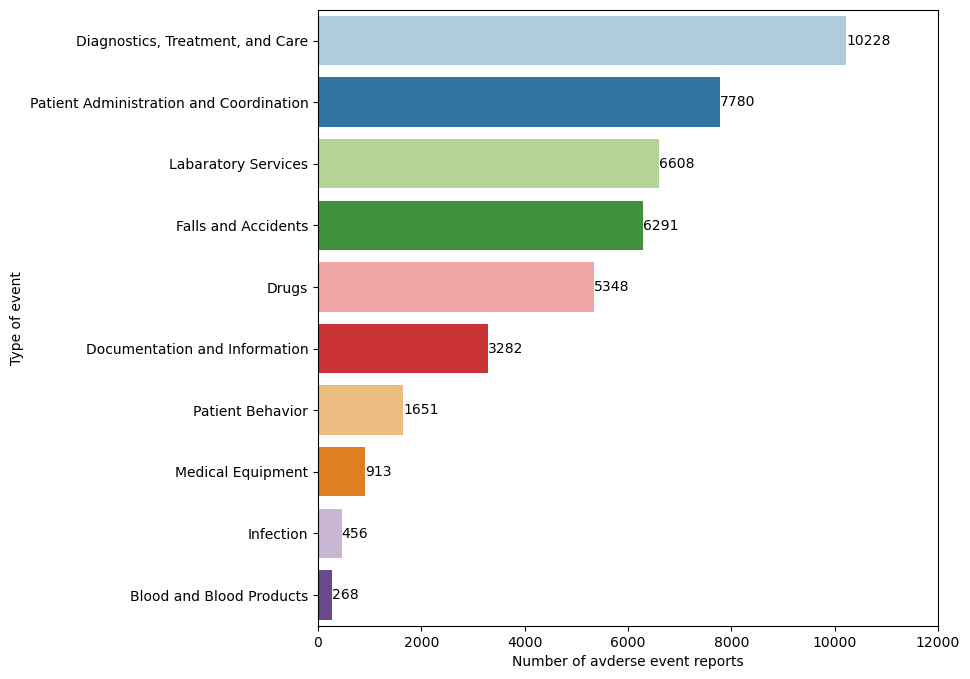

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
a = sns.countplot(y=df.EventType, order = df.EventType.value_counts().index, ax=ax, palette="Paired")

# translate the event types to english for the y-axis
a.set_yticks(xticks)
a.set_yticklabels(xticklabels)

# set axis-labels
plt.xlabel('Number of avderse event reports')
plt.ylabel('Type of event')

# set bar labels
for label in a.containers:
    a.bar_label(label)

# adjust xlim to fit the bar_labels
a.set_xlim(right=12000)

### Severity

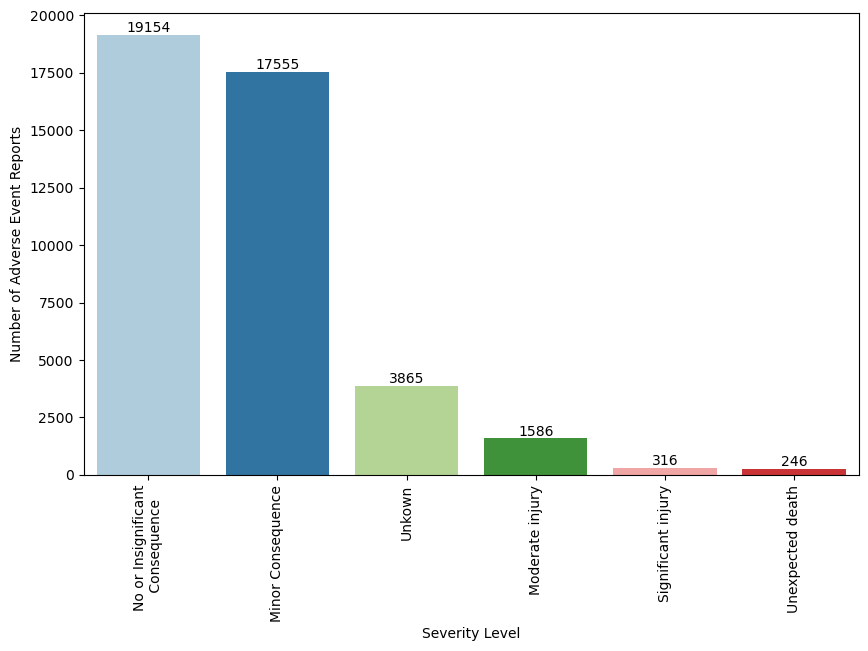

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=df.SeverityLevel, order = df.SeverityLevel.value_counts().index, palette="Paired")

# translate the event types to english for the x-axis
ax.set_xticks(xticks_severity)
ax.set_xticklabels(xticklabels_severity, rotation=90)

# set axis-labels
plt.xlabel('Severity Level')
plt.ylabel('Number of Adverse Event Reports')

# set bar labels
for label in ax.containers:
    ax.bar_label(label)

Text(0, 0.5, 'Number of Adverse Event Reports')

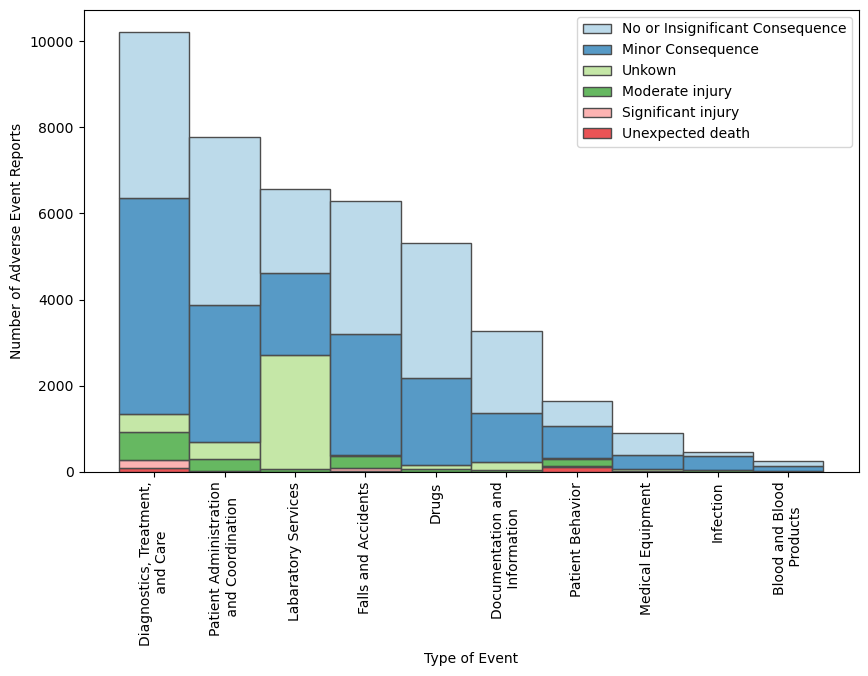

In [63]:
fig, ax = plt.subplots(figsize=(10,6))

df['Ordered'] = pd.Categorical(df.EventType, df.EventType.value_counts().index)
ax = sns.histplot(x=df.Ordered, hue=df.SeverityLevel, hue_order=df.SeverityLevel.value_counts().index, multiple="stack", palette="Paired", edgecolor=".3")

# translate the event types to english for the x-axis
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90)

# removes the norwegian legend and adds a norwegian one
legend = ax.get_legend()
handles = legend.legend_handles
legend.remove()

plt.legend(handles, xticklabels_severity)


# set axis-labels
plt.xlabel('Type of Event')
plt.ylabel('Number of Adverse Event Reports')

### Report Title

In [14]:
# average length of report titles
avg_len_title= df.ReportTitle.str.len().mean()
avg_len_title

30.66970227670753

In [15]:
# add a coloumn with the lenght of the report title
df['ReportTitleLength'] = df.ReportTitle.str.len()

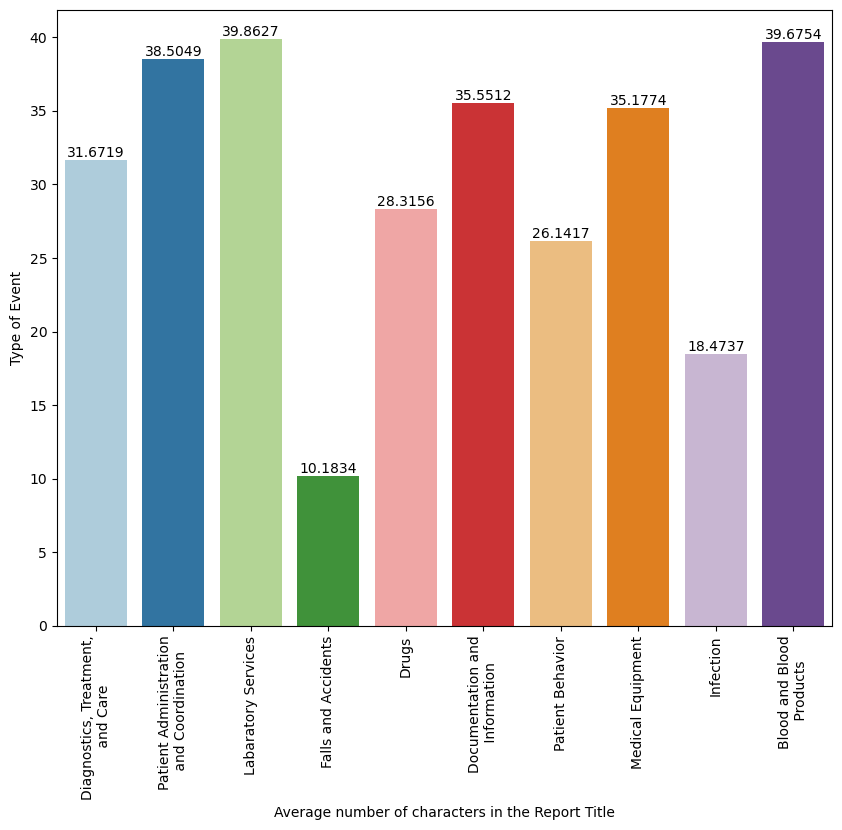

In [54]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=df.EventType, y=df.ReportTitleLength, order=df.EventType.value_counts().index, errorbar = None, palette="Paired")

# translate the event types to english for the x-axis
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90)

# set axis-labels
plt.xlabel('Average number of characters in the Report Title')
plt.ylabel('Type of Event')

# set bar labels
for label in ax.containers:
    ax.bar_label(label)

In [17]:
# add a coloumn with the word count of the Report Title
df['ReportTitleWordCount'] = df.ReportTitle.str.split().str.len()

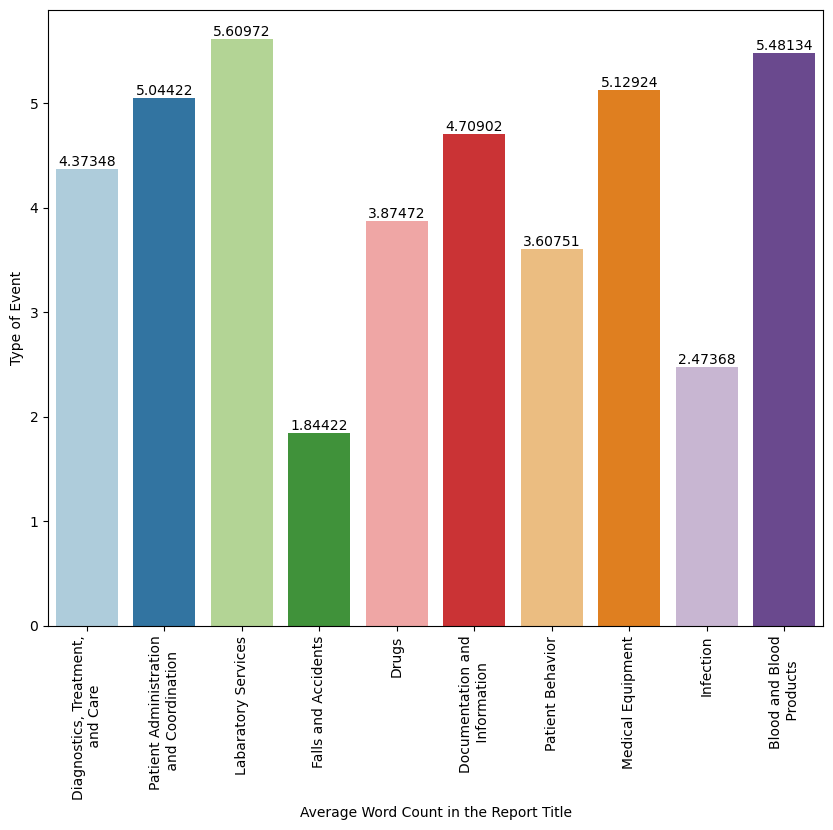

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=df.EventType, y=df.ReportTitleWordCount, order = df.EventType.value_counts().index, errorbar=None, palette="Paired")

# translate the event types to english for the x-axis
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90)

# set axis-labels
plt.xlabel('Average Word Count in the Report Title')
plt.ylabel('Type of Event')

# set bar labels
for label in ax.containers:
    ax.bar_label(label)

In [19]:
# top 10 most frequently used report titles
df.ReportTitle.value_counts().head(10)

ReportTitle
fall                                                          3889
feilmedisinering                                               339
brudd på samarbeidsavtale med underliggende retningslinjer     315
trykksår                                                       254
flebitt                                                        227
subcutan infusjon                                              102
pasientfall                                                     98
medikamentavvik                                                 88
avvik                                                           84
pasientskade                                                    83
Name: count, dtype: int64

#### Further investigation of report titles

In [47]:
rslt_df_0 = df[df.ReportTitle == 'fall']
print(len(rslt_df_0.index))
rslt_df_0.EventType.value_counts()

3889


EventType
Pasientuhell og fall                  3869
Diagnostikk, behandling og pleie        14
Pasientatferd                            4
Pasientadministrasjon/ samhandling       2
Name: count, dtype: int64

In [21]:
rslt_df_1 = df[df.ReportTitle.str.contains('esa ')]
print(len(rslt_df_1.index))
rslt_df_1.EventType.value_counts()

1278


EventType
Pasientadministrasjon/ samhandling    1030
Dokumentasjon/ informasjon             145
Diagnostikk, behandling og pleie        52
Legemidler                              36
Laboratorietjenester                    11
Medisinsk utstyr                         2
Pasientuhell og fall                     1
Pasientatferd                            1
Name: count, dtype: int64

In [22]:
rslt_df_2 = df[df.ReportTitle.str.contains('elements')]
print(len(rslt_df_2.index))
rslt_df_2.EventType.value_counts()

249


EventType
Pasientadministrasjon/ samhandling    230
Dokumentasjon/ informasjon             13
Diagnostikk, behandling og pleie        5
Laboratorietjenester                    1
Name: count, dtype: int64

### Event Description

In [23]:
#average length of event descriptions
avg_len_description = df.EventDescription.str.len().mean()
avg_len_description

306.15115002918856

In [24]:
# add a coloumn with the lenght of the event description
df['EventDescriptionLength'] = df.EventDescription.str.len()

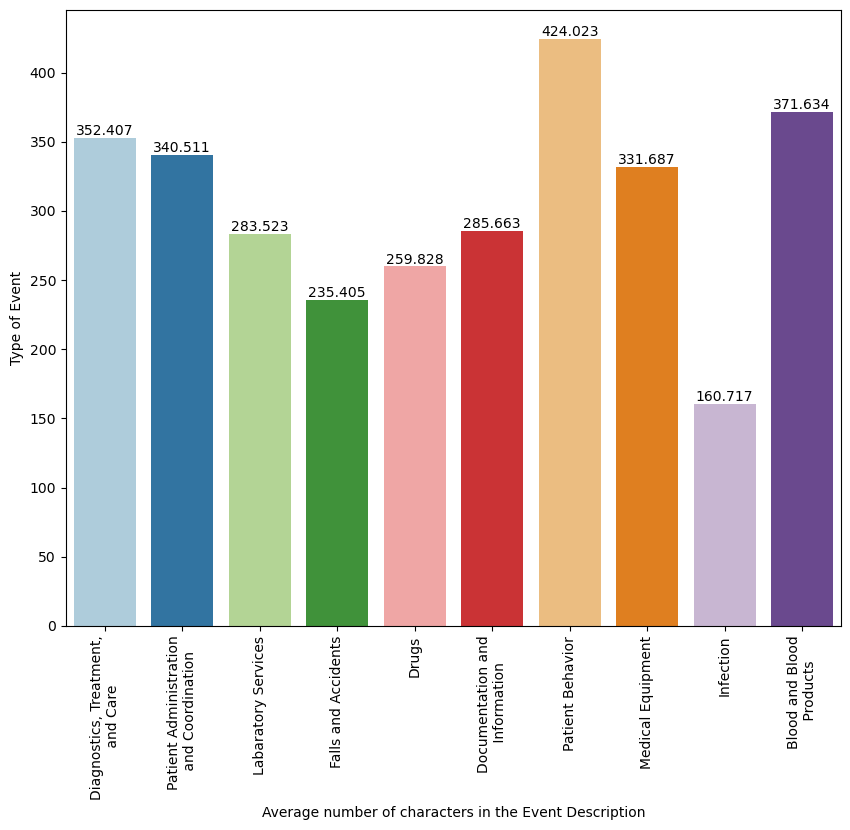

In [56]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=df.EventType, y=df.EventDescriptionLength, order = df.EventType.value_counts().index, palette="Paired", errorbar=None)

# translate the event types to english for the x-axis
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90)

# set axis-labels
plt.xlabel('Average number of characters in the Event Description')
plt.ylabel('Type of Event')

# set bar labels
for label in ax.containers:
    ax.bar_label(label)

In [26]:
# add a coloumn with the word count of the event description
df['EventDescirptionWordCount'] = df.EventDescription.str.split().str.len()
# average number of words used in Event Description 
df.EventDescirptionWordCount.mean()

49.9343841214244

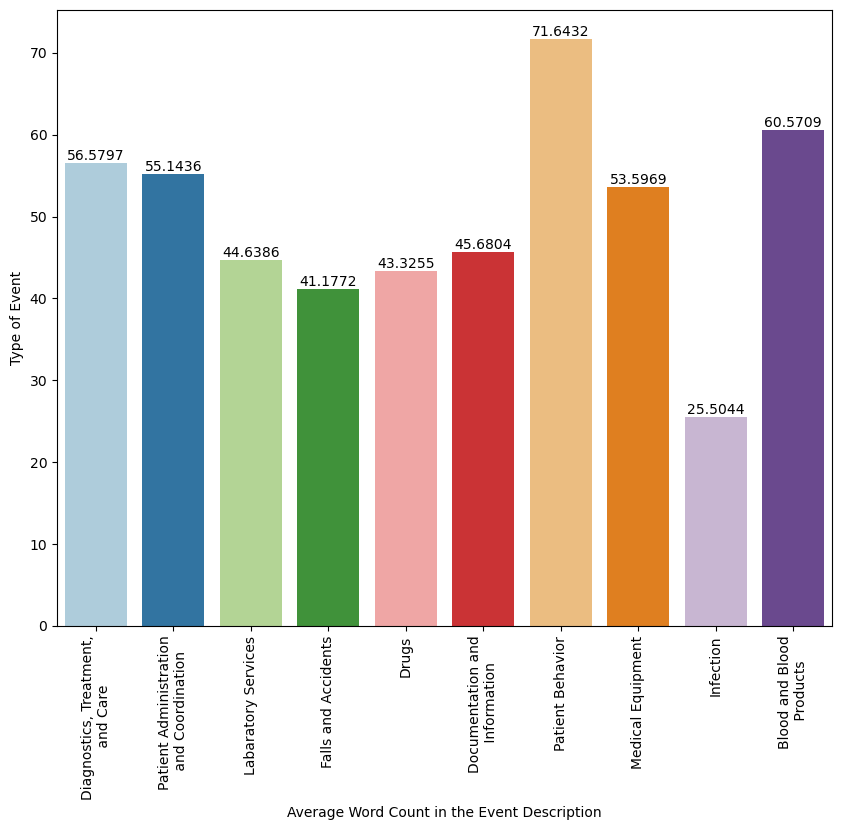

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=df.EventType, y=df.EventDescirptionWordCount, order = df.EventType.value_counts().index, errorbar=None, palette="Paired")

# translate the event types to english for the x-axis
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90)

# set axis-labels
plt.xlabel('Average Word Count in the Event Description')
plt.ylabel('Type of Event')

# set bar labels
for label in ax.containers:
    ax.bar_label(label)

In [28]:
# top 10 of the most frequently used event descriptions
df.EventDescription.value_counts().head(10)

EventDescription
se vedlegg                                                365
annet                                                      77
2. manglende epikrise                                      71
3. mangler ved varsling                                    51
henvisning ikke vurdert av lege innen frist.               42
4. mangler ved medisinliste                                28
manglende epikrise                                         26
mangler ved varsling                                       19
manglende/feil i legemiddeldokumentasjon                   18
2. manglende epikrise<br />4. mangler ved medisinliste     17
Name: count, dtype: int64

#### Investigation of frecuently used descriptions

In [29]:
rslt_df_3 = df[df.EventDescription == 'se vedlegg']

print(len(rslt_df_3.index))
rslt_df_3.EventType.value_counts()

365


EventType
Pasientadministrasjon/ samhandling    296
Dokumentasjon/ informasjon             39
Diagnostikk, behandling og pleie       15
Laboratorietjenester                    7
Legemidler                              6
Medisinsk utstyr                        1
Pasientatferd                           1
Name: count, dtype: int64

In [30]:
rslt_df_4 = df[df.EventDescription == 'annet']

print(len(rslt_df_4.index))
rslt_df_4.EventType.value_counts()

77


EventType
Pasientadministrasjon/ samhandling    59
Diagnostikk, behandling og pleie       8
Laboratorietjenester                   6
Dokumentasjon/ informasjon             4
Name: count, dtype: int64

In [31]:
rslt_df_5 = df[df.EventDescription.str.contains('manglende epikrise')]

print(len(rslt_df_5.index))
rslt_df_5.EventType.value_counts()

244


EventType
Pasientadministrasjon/ samhandling    201
Dokumentasjon/ informasjon             36
Legemidler                              5
Diagnostikk, behandling og pleie        2
Name: count, dtype: int64

In [32]:
rslt_df_6 = df[df.EventDescription.str.contains('mangler ved varsling')]

print(len(rslt_df_6.index))
rslt_df_6.EventType.value_counts()

115


EventType
Pasientadministrasjon/ samhandling    102
Dokumentasjon/ informasjon             11
Diagnostikk, behandling og pleie        2
Name: count, dtype: int64

In [33]:
rslt_df_7 = df[df.EventDescription.str.contains('mangler ved medisinliste')]

print(len(rslt_df_7.index))
rslt_df_7.EventType.value_counts()

99


EventType
Pasientadministrasjon/ samhandling    71
Dokumentasjon/ informasjon            15
Legemidler                            11
Diagnostikk, behandling og pleie       2
Name: count, dtype: int64

In [34]:
rslt_df_8 = df[df.EventDescription.str.contains('hjemsendelse før aksept')]

print(len(rslt_df_8.index))
rslt_df_8.EventType.value_counts()

38


EventType
Pasientadministrasjon/ samhandling    36
Diagnostikk, behandling og pleie       2
Name: count, dtype: int64

In [35]:
rslt_df_9 = df[df.EventDescription.str.contains('esa ')]

print(len(rslt_df_9.index))
rslt_df_9.EventType.value_counts()

447


EventType
Pasientadministrasjon/ samhandling    354
Dokumentasjon/ informasjon             48
Diagnostikk, behandling og pleie       20
Laboratorietjenester                   10
Legemidler                              7
Pasientuhell og fall                    5
Medisinsk utstyr                        2
Pasientatferd                           1
Name: count, dtype: int64

In [36]:
rslt_df_10 = df[df.EventDescription.str.contains('elements')]

print(len(rslt_df_10.index))
rslt_df_10.EventType.value_counts()

236


EventType
Pasientadministrasjon/ samhandling    207
Dokumentasjon/ informasjon             14
Diagnostikk, behandling og pleie        7
Laboratorietjenester                    6
Legemidler                              2
Name: count, dtype: int64

In [37]:
rslt_df_11 = df[df.EventDescription.str.contains('hjemsendelse før aksept') | df.EventDescription.str.contains('mangler ved medisinliste')|df.EventDescription.str.contains('mangler ved varsling')|df.EventDescription.str.contains('manglende epikrise') | df.EventDescription.str.contains('esa ') | df.EventDescription.str.contains('esa ') | df.EventDescription.str.contains('elements') | df.EventDescription.str.contains('elements')]

print(len(rslt_df_11.index))
rslt_df_11.EventType.value_counts()

1074


EventType
Pasientadministrasjon/ samhandling    879
Dokumentasjon/ informasjon            113
Diagnostikk, behandling og pleie       34
Legemidler                             24
Laboratorietjenester                   16
Pasientuhell og fall                    5
Medisinsk utstyr                        2
Pasientatferd                           1
Name: count, dtype: int64

In [38]:
# Result 11, but added titles including 'esa ' and 'elements'
rslt_df_12 = df[df.EventDescription.str.contains('hjemsendelse før aksept') | df.EventDescription.str.contains('mangler ved medisinliste')|df.EventDescription.str.contains('mangler ved varsling')|df.EventDescription.str.contains('manglende epikrise') | df.EventDescription.str.contains('esa ') | df.EventDescription.str.contains('esa ') | df.EventDescription.str.contains('elements') | df.EventDescription.str.contains('elements') | df.ReportTitle.str.contains('esa ') | df.ReportTitle.str.contains('elements')]

print(len(rslt_df_12.index))
rslt_df_12.EventType.value_counts()

1782


EventType
Pasientadministrasjon/ samhandling    1455
Dokumentasjon/ informasjon             183
Diagnostikk, behandling og pleie        69
Legemidler                              40
Laboratorietjenester                    25
Pasientuhell og fall                     6
Medisinsk utstyr                         2
Pasientatferd                            2
Name: count, dtype: int64